In [68]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [69]:
df=pd.read_csv('abalone.csv')
df.head()

,Gender,Length,Diameter,Height,Whole weight,shucked weight,viscera weight,Shell weight,Rings(age)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [70]:
df.sample(3)

,Gender,Length,Diameter,Height,Whole weight,shucked weight,viscera weight,Shell weight,Rings(age)
4096,F,0.635,0.500,0.175,1.477,0.6840,0.3005,0.390,12
1593,I,0.525,0.380,0.135,0.615,0.2610,0.1590,0.175,8
2520,M,0.525,0.425,0.190,0.872,0.4625,0.1725,0.199,9


In [71]:
df.tail()

,Gender,Length,Diameter,Height,Whole weight,shucked weight,viscera weight,Shell weight,Rings(age)
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [72]:
df.dtypes

Gender             object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
shucked weight    float64
viscera weight    float64
Shell weight      float64
Rings(age)          int64
dtype: object

In [73]:
df=pd.DataFrame(data=df)
df

,Gender,Length,Diameter,Height,Whole weight,shucked weight,viscera weight,Shell weight,Rings(age)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [74]:
df.shape

(4177, 9)

In [75]:
df.isnull().sum()

Gender            0
Length            0
Diameter          0
Height            0
Whole weight      0
shucked weight    0
viscera weight    0
Shell weight      0
Rings(age)        0
dtype: int64

<AxesSubplot:>

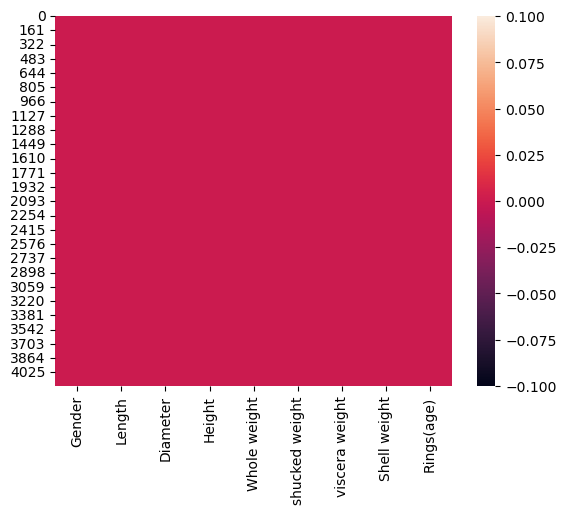

In [76]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

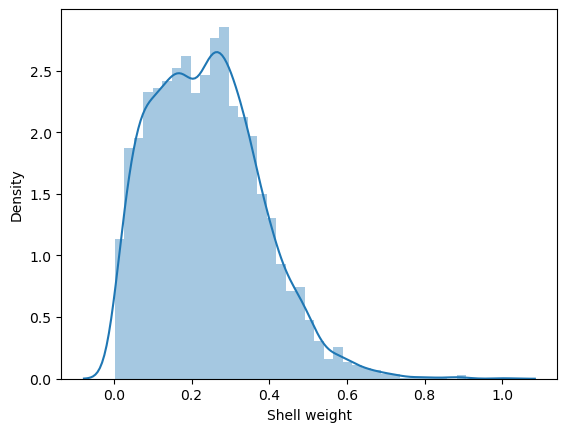

In [77]:
sns.distplot(df['Shell weight'])

In [78]:
df.columns

Index(['Gender', 'Length', 'Diameter', 'Height', 'Whole weight',
       'shucked weight', 'viscera weight', 'Shell weight', 'Rings(age)'],
      dtype='object')

In [79]:
df.iloc[:,0]

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Gender, Length: 4177, dtype: object

In [80]:
lencode=LabelEncoder()
df['Gender']=lencode.fit_transform(df['Gender'])
df

,Gender,Length,Diameter,Height,Whole weight,shucked weight,viscera weight,Shell weight,Rings(age)
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<AxesSubplot:xlabel='Height', ylabel='Count'>

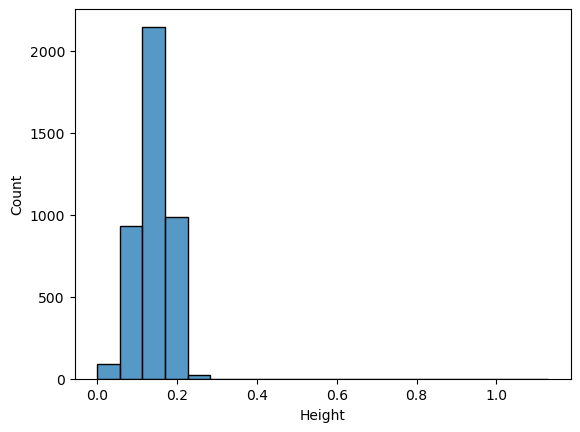

In [81]:
sns.histplot(df['Height'],bins=20)

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

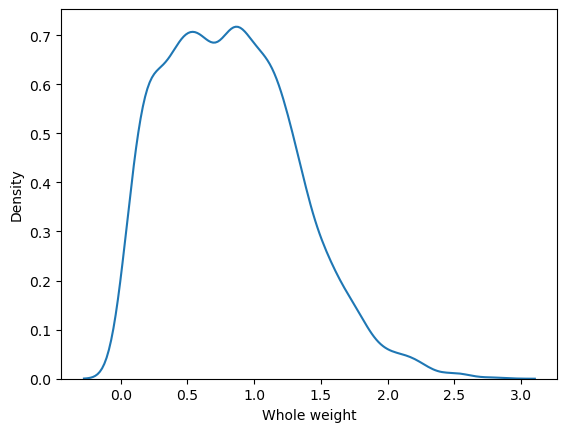

In [82]:
sns.kdeplot(df['Whole weight'])

<AxesSubplot:xlabel='Length', ylabel='Height'>

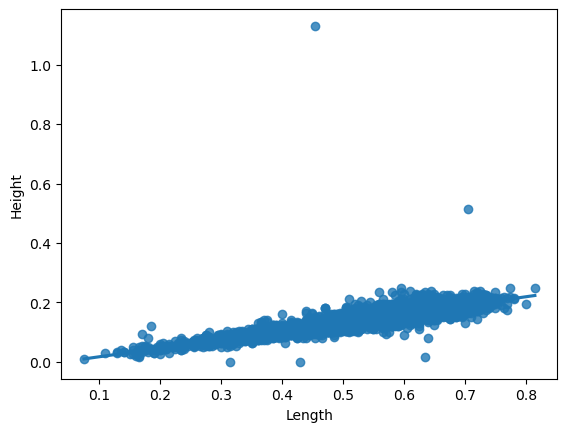

In [83]:
sns.regplot(x='Length',y='Height',data=df)

In [84]:
df.describe()

,Gender,Length,Diameter,Height,Whole weight,shucked weight,viscera weight,Shell weight,Rings(age)
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [85]:
df.skew()

Gender           -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
shucked weight    0.719098
viscera weight    0.591852
Shell weight      0.620927
Rings(age)        1.114102
dtype: float64

In [86]:
df['Height']=np.sqrt(df['Height'])
df.skew()

Gender           -0.098155
Length           -0.639873
Diameter         -0.609198
Height           -0.295641
Whole weight      0.530959
shucked weight    0.719098
viscera weight    0.591852
Shell weight      0.620927
Rings(age)        1.114102
dtype: float64

In [87]:
#df=np.sqrt(df)
#df.skew()

In [88]:
#detect outliers

from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        237,  238,  238,  238,  239,  239,  270,  275,  277,  278,  294,
        306,  310,  313,  314,  334,  351,  355,  358,  358,  362,  375,
        416,  417,  428,  431,  433,  469,  478,  480,  501,  526,  526,
        530,  572,  628,  673,  674,  675,  678,  694,  694,  696,  696,
        718,  719,  719,  719,  720,  720,  720,  744,  754,  756,  811,
        891,  891,  891, 1048, 1051, 1051, 1052, 1174, 1193, 1197, 1199,
       1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257,
       1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429,
       1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762, 1763,
       1763, 1763, 1821, 1982, 1986, 1987, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2114, 2157, 2161, 2169, 2171, 2172, 2176, 2180,
       2199, 2201, 2208, 2209, 2274, 2275, 2305, 2

In [89]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)
df=dfnew

dfnew.shape= (4019, 9)


In [90]:
df.corr()

,Gender,Length,Diameter,Height,Whole weight,shucked weight,viscera weight,Shell weight,Rings(age)
Gender,1.000000,-0.043978,-0.046893,-0.047602,-0.034812,-0.016429,-0.045187,-0.043998,-0.033682
Length,-0.043978,1.000000,0.985807,0.907285,0.935022,0.909742,0.908448,0.914874,0.563535
Diameter,-0.046893,0.985807,1.000000,0.912648,0.934606,0.904681,0.904582,0.922138,0.581657
Height,-0.047602,0.907285,0.912648,1.000000,0.882321,0.835174,0.860207,0.889508,0.616311
Whole weight,-0.034812,0.935022,0.934606,0.882321,1.000000,0.970881,0.966476,0.961026,0.545911
shucked weight,-0.016429,0.909742,0.904681,0.835174,0.970881,1.000000,0.929837,0.895712,0.437522
viscera weight,-0.045187,0.908448,0.904582,0.860207,0.966476,0.929837,1.000000,0.919089,0.520584
Shell weight,-0.043998,0.914874,0.922138,0.889508,0.961026,0.895712,0.919089,1.000000,0.620817
Rings(age),-0.033682,0.563535,0.581657,0.616311,0.545911,0.437522,0.520584,0.620817,1.000000


<AxesSubplot:>

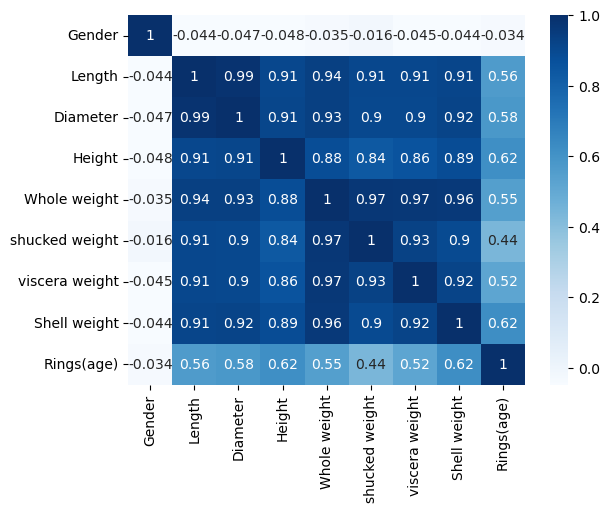

In [92]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
x=df.iloc[:,0:-1]
x

,Gender,Length,Diameter,Height,Whole weight,shucked weight,viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960


In [95]:
x.shape

(4019, 8)

In [97]:
x.shape[1]

8

In [99]:
y=df.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings(age), Length: 4019, dtype: int64

In [102]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [103]:
vif_calc()

   VIF factor        features
0    2.632493          Gender
1  802.340579          Length
2  763.963727        Diameter
3  154.948351          Height
4  441.891678    Whole weight
5  110.275122  shucked weight
6   65.499021  viscera weight
7   92.744708    Shell weight


In [104]:
df.drop(['Length','shucked weight'],axis=1,inplace=True) 

In [105]:
df

,Gender,Diameter,Height,Whole weight,viscera weight,Shell weight,Rings(age)
0,2,0.365,0.308221,0.5140,0.1010,0.1500,15
1,2,0.265,0.300000,0.2255,0.0485,0.0700,7
2,0,0.420,0.367423,0.6770,0.1415,0.2100,9
3,2,0.365,0.353553,0.5160,0.1140,0.1550,10
4,1,0.255,0.282843,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490,11
4173,2,0.440,0.367423,0.9660,0.2145,0.2605,10
4174,2,0.475,0.452769,1.1760,0.2875,0.3080,9
4175,0,0.485,0.387298,1.0945,0.2610,0.2960,10


In [106]:
x.shape

(4019, 8)

In [107]:
vif_calc()

   VIF factor        features
0    2.632493          Gender
1  802.340579          Length
2  763.963727        Diameter
3  154.948351          Height
4  441.891678    Whole weight
5  110.275122  shucked weight
6   65.499021  viscera weight
7   92.744708    Shell weight


<AxesSubplot:>

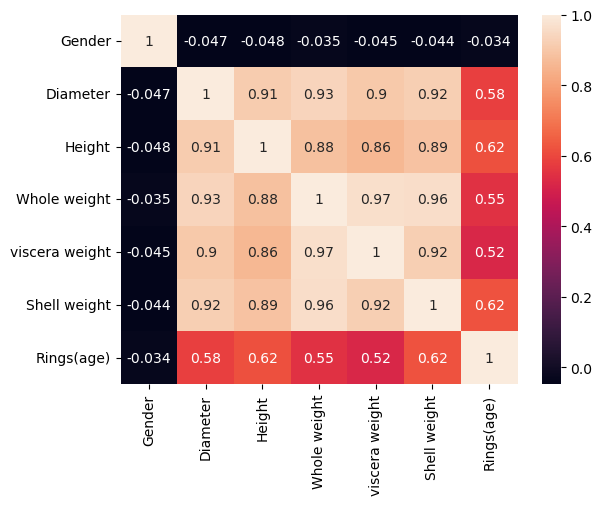

In [108]:
sns.heatmap(df.corr(),annot=True)

In [109]:
x=df.iloc[:,0:-1]
x

,Gender,Diameter,Height,Whole weight,viscera weight,Shell weight
0,2,0.365,0.308221,0.5140,0.1010,0.1500
1,2,0.265,0.300000,0.2255,0.0485,0.0700
2,0,0.420,0.367423,0.6770,0.1415,0.2100
3,2,0.365,0.353553,0.5160,0.1140,0.1550
4,1,0.255,0.282843,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490
4173,2,0.440,0.367423,0.9660,0.2145,0.2605
4174,2,0.475,0.452769,1.1760,0.2875,0.3080
4175,0,0.485,0.387298,1.0945,0.2610,0.2960


In [110]:
x.shape

(4019, 6)

In [111]:
y.shape

(4019,)

In [113]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.15835802, -0.42766545, -1.1645936 , -0.63693837, -0.7267137 ,
        -0.63462928],
       [ 1.15835802, -1.4770503 , -1.32420851, -1.27043818, -1.23554834,
        -1.26104553],
       [-1.28480172,  0.14949622, -0.01509984, -0.27901646, -0.33418412,
        -0.1648171 ],
       ...,
       [ 1.15835802,  0.72665788,  1.64199279,  0.81670767,  1.08086078,
         0.60254279],
       [-1.28480172,  0.83159637,  0.37079505,  0.63774671,  0.82402043,
         0.50858036],
       [ 1.15835802,  1.56616576,  1.4248959 ,  2.51299401,  1.94345664,
         2.06679076]])

In [114]:
x.shape

(4019, 6)

In [115]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=50)


In [116]:
xtrain.shape

(2813, 6)

In [117]:
ytrain.shape

(2813,)

In [118]:
xtest.shape

(1206, 6)

In [119]:
ytest.shape

(1206,)

In [121]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)
lr.coef_

array([-0.02619526,  0.36546251,  1.18420676, -2.57554077, -0.02402104,
        2.85808191])

In [123]:
features=['Gender','Diameter','Height','Whole weight','viscera weight','Shell weight']

list(zip(lr.coef_,features))

[(-0.026195263218893924, 'Gender'),
 (0.3654625113458531, 'Diameter'),
 (1.1842067643238896, 'Height'),
 (-2.5755407747850385, 'Whole weight'),
 (-0.024021037758259374, 'viscera weight'),
 (2.8580819142662253, 'Shell weight')]

In [124]:
cfdf=pd.DataFrame(data=lr.coef_,index=features)
cfdf

,0
Gender,-0.026195
Diameter,0.365463
Height,1.184207
Whole weight,-2.575541
viscera weight,-0.024021
Shell weight,2.858082
